# **Churn Analytics**
#### **Group 6:**
Group Members
* Harish Kumar Dakshinamoorthy
* Sarath Krishna Marath
* Sabiha Begum Mohammed
* Nilkumar Ghanshyambhai Patel
* Shreya Pankajkumar Thakkar


In this project, we aim to analyze customer churn for an e-commerce platform. Our goal is to identify key factors contributing to churn, such as customer behavior, preferences, and demographics. Using data analysis and machine learning models like logistic regression and decision trees, we will provide actionable insights to help the business reduce churn and improve customer retention.


In [1]:
# Importing all the necessory libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import warnings
warnings.filterwarnings("ignore")

## **Data Import**

In [2]:
e_commerce = pd.read_csv("E-Commerce Churn Data.csv")

## **Data Overview**

In [3]:
# data overview
e_commerce.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


In [4]:
# data information
e_commerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [5]:
# Checking for the number of missing values and its percentage
missing_data = e_commerce.isnull().sum()
missing_percentage = e_commerce.isnull().sum() / len(e_commerce) * 100

# Create a new dataframe to store both values
missing_df = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_percentage})

# Filter to show only columns with missing values
missing_df = missing_df[missing_df['Missing Values'] > 0]

# Display the result
print(missing_df)

                             Missing Values  Percentage
Tenure                                  264    4.689165
WarehouseToHome                         251    4.458259
HourSpendOnApp                          255    4.529307
OrderAmountHikeFromlastYear             265    4.706927
CouponUsed                              256    4.547069
OrderCount                              258    4.582593
DaySinceLastOrder                       307    5.452931


## **Data Cleaning**

`After the data overview, we find that there are few issues before proceeding to further analysis. We have several columns that have missing values.`

`The below columns have missing values`
* ***Tenure:*** 264 missing values
* ***WarehouseToHome:*** 251 missing values
* ***HourSpendOnApp:*** 255 missing values
* ***OrderAmountHikeFromlastYear:*** 265 missing values
* ***CouponUsed:*** 256 missing values
* ***OrderCount:*** 258 missing values
* ***DaySinceLastOrder:*** 307 missing values
`


`We are going to remove the missing rows and check if there is any significant impact in the dataset`

In [6]:
# Number of rows in the original dataset
original_row_count = len(e_commerce)

# Dropping rows with any missing values
rows_after_dropping = e_commerce.dropna()

# Number of rows remaining after dropping
remaining_row_count = len(rows_after_dropping)

# Calculatng how many rows we would lose
rows_lost = original_row_count - remaining_row_count

# Calculating the percentage of rows lost
percentage_lost = (rows_lost / original_row_count) * 100

print(f"Original number of rows: {original_row_count}")
print(f"Remaining number of rows after removing missing values: {remaining_row_count}")
print(f"Number of rows lost: {rows_lost}")
print(f"Percentage of rows lost: {percentage_lost:.2f}%")


Original number of rows: 5630
Remaining number of rows after removing missing values: 3774
Number of rows lost: 1856
Percentage of rows lost: 32.97%


`If I remove the missing values, I'm alost loosing 33% of my data, which is huge. So I'm going to perform the alternate method. Let us fill the data with the mean or the median. Before that we are going to check whether the data is normally distributed or not.`

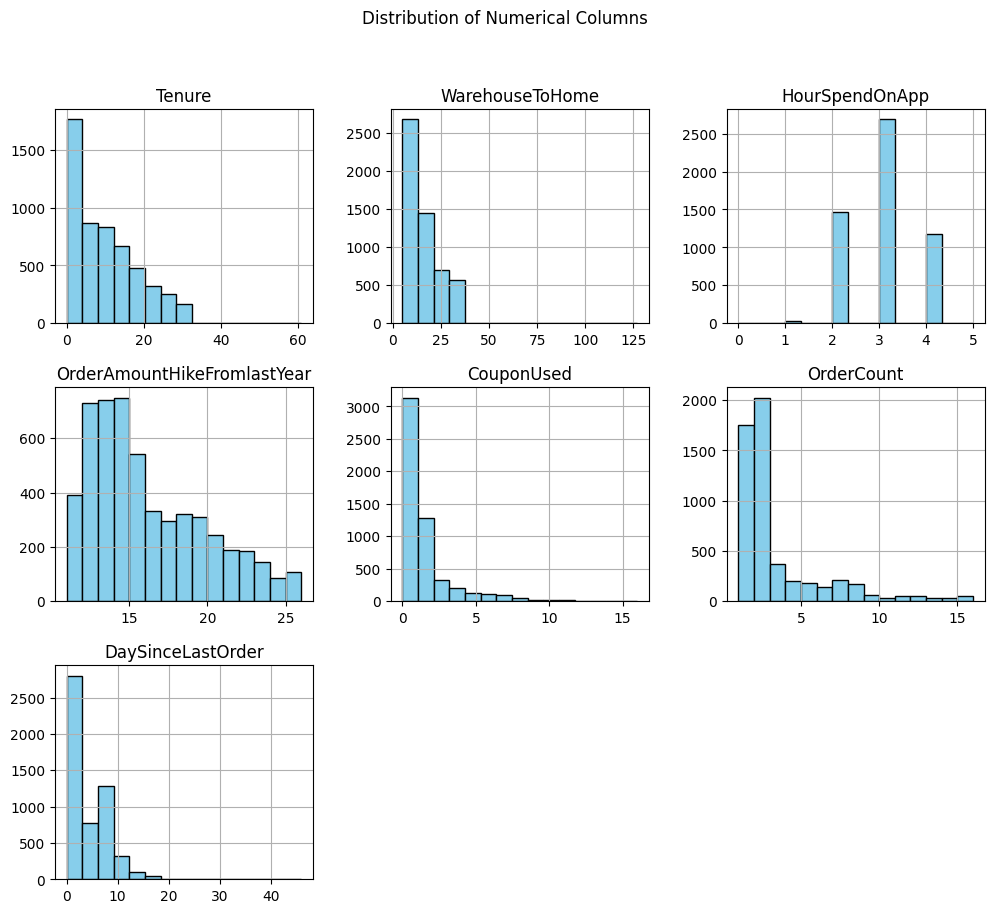

In [7]:
import matplotlib.pyplot as plt

# List of numerical columns with missing values
numerical_columns = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 
                     'CouponUsed', 'OrderCount', 'DaySinceLastOrder']

# Histograms to visually inspect the distribution of each numerical column
e_commerce[numerical_columns].hist(figsize=(12, 10), bins=15, color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Numerical Columns')
plt.show()


`Since most of the graph looks skewed, let us use the median for imputation`

In [8]:
# List of numerical columns with missing values
numerical_columns = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 
                     'CouponUsed', 'OrderCount', 'DaySinceLastOrder']

# Imputing missing values with the median of each column
e_commerce[numerical_columns] = e_commerce[numerical_columns].fillna(e_commerce[numerical_columns].median())



In [9]:
# Verifying that there are no missing values left in the dataset
e_commerce.isnull().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [10]:
e_commerce.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,9.0,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,9.0,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,3.0,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


Before moving forward to EDA, let us check the different values in the categorical column

In [11]:
# List of categorical columns
categorical_columns = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']

# Displaying the unique values for each categorical column
for column in categorical_columns:
    unique_values = e_commerce[column].unique()
    print(f"Unique values in '{column}': {unique_values}")


Unique values in 'PreferredLoginDevice': ['Mobile Phone' 'Phone' 'Computer']
Unique values in 'PreferredPaymentMode': ['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']
Unique values in 'Gender': ['Female' 'Male']
Unique values in 'PreferedOrderCat': ['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']
Unique values in 'MaritalStatus': ['Single' 'Divorced' 'Married']


The following are the issues we found in the above result: 

**PreferredLoginDevice**:
- *Values*: `['Mobile Phone', 'Phone', 'Computer']`
- *Issue*: It seems like `Mobile Phone` and `Phone` are likely referring to the same category.
- *Action*: We can standardize these two values by replacing `Phone` with `Mobile Phone` to avoid redundancy.

**PreferredPaymentMode**:
- *Values*: `['Debit Card', 'UPI', 'CC', 'Cash on Delivery', 'E wallet', 'COD', 'Credit Card']`
- *Issue*: 
    - `CC` and `Credit Card` are the same but appear as separate values.
    - `COD` and `Cash on Delivery` also refer to the same thing.
- *Action*: We can standardize these by replacing `CC` with `Credit Card` and `COD` with `Cash on Delivery`.

**PreferedOrderCat**:
- *Values*: `['Laptop & Accessory', 'Mobile', 'Mobile Phone', 'Others', 'Fashion', 'Grocery']`
- *Issue*: `Mobile` and `Mobile Phone` likely refer to the same thing.
- *Action*: We can standardize by replacing `Mobile` with `Mobile Phone`.

In [12]:
# Standardizing 'PreferredLoginDevice'
e_commerce['PreferredLoginDevice'] = e_commerce['PreferredLoginDevice'].replace({'Phone': 'Mobile Phone'})

# Standardizing 'PreferredPaymentMode'
e_commerce['PreferredPaymentMode'] = e_commerce['PreferredPaymentMode'].replace({'CC': 'Credit Card', 'COD': 'Cash on Delivery'})

# Standardizing 'PreferedOrderCat'
e_commerce['PreferedOrderCat'] = e_commerce['PreferedOrderCat'].replace({'Mobile': 'Mobile Phone'})

# Verifying changes
for column in categorical_columns:
    unique_values = e_commerce[column].unique()
    print(f"Updated unique values in '{column}': {unique_values}")


Updated unique values in 'PreferredLoginDevice': ['Mobile Phone' 'Computer']
Updated unique values in 'PreferredPaymentMode': ['Debit Card' 'UPI' 'Credit Card' 'Cash on Delivery' 'E wallet']
Updated unique values in 'Gender': ['Female' 'Male']
Updated unique values in 'PreferedOrderCat': ['Laptop & Accessory' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']
Updated unique values in 'MaritalStatus': ['Single' 'Divorced' 'Married']


## **Exploratory Analysis**

#### **1. Churn Distribution**
We will visualize the overall churn distribution to understand how many customers have churned versus how many remain loyal. This provides a high-level view of churn, helping to gauge the scale of the problem. A high churn rate highlights the need for improving customer retention strategies.

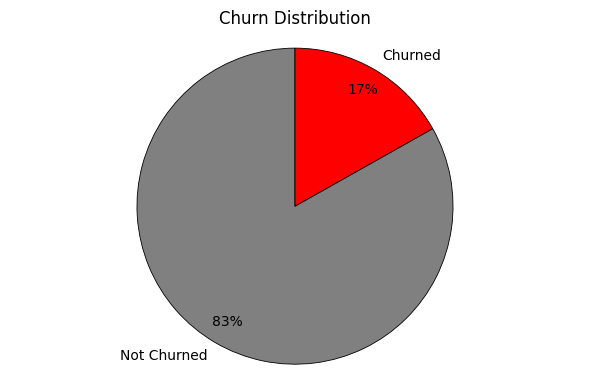

In [13]:
# Generate churn counts
churn_counts = e_commerce['Churn'].value_counts().sort_index()
labels = ['Not Churned', 'Churned'] 
sizes = churn_counts.values

plt.figure(figsize=(6,4))
# Plotting the pie chart with smaller size and new colors
plt.pie(sizes, labels=labels, autopct='%.0f%%', startangle=90, 
        colors=['grey', 'red'], wedgeprops={'edgecolor': 'black', 'linewidth': 0.6}, 
        pctdistance=0.85)

# Adding title and equal aspect ratio
plt.title('Churn Distribution', fontsize=12)  # Reduced font size for a smaller plot
plt.axis('equal')  # Ensures the pie chart is a circle.
plt.tight_layout()  # Adds better spacing and layout
plt.show()


We find that 83% of customers have not churned, while 17% have churned. The 17% churn rate indicates that there’s room for improvement in customer retention strategies. Reducing churn could lead to significant business growth.

#### **2. Churn by Categorical Features**
We will use stacked bar plots to visualize how churn is distributed across different categorical variables like Preferred Payment Mode, Gender, Marital Status, and Order Category. Identifying customer segments with higher churn rates helps focus retention strategies on those groups.

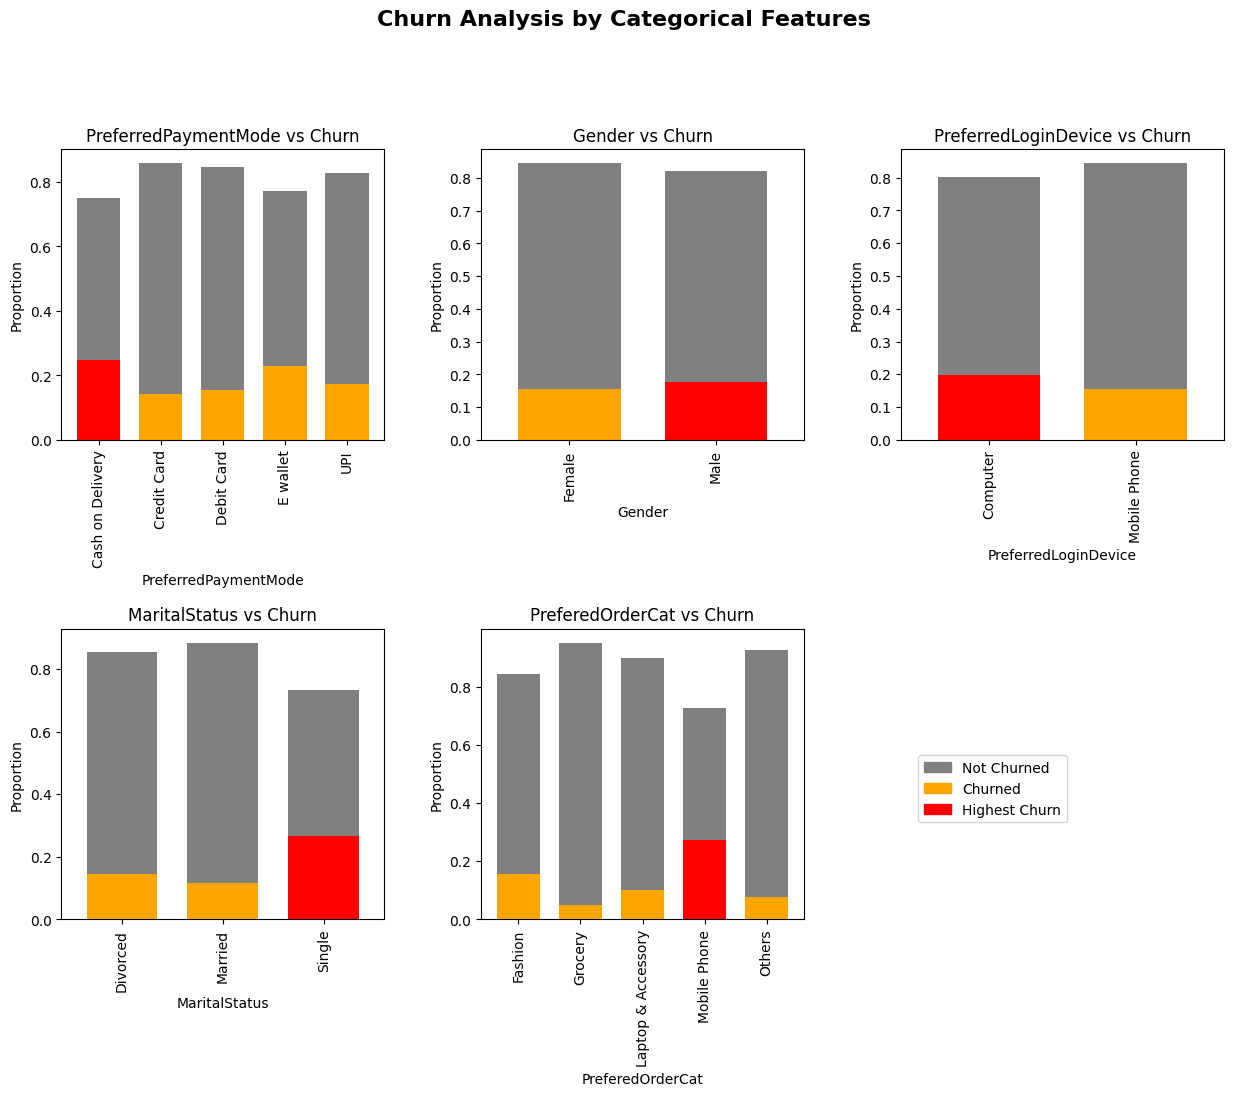

In [14]:
# List of categorical columns to plot
categorical_columns = ['PreferredPaymentMode', 'Gender', 'PreferredLoginDevice', 'MaritalStatus', 'PreferedOrderCat']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))  

# Adjust the space between the plots using subplots_adjust
plt.subplots_adjust(hspace=0.65, wspace=0.3)  # Adds space between rows (hspace) and columns (wspace)

# Flattening the axes array for easy iteration
axes = axes.flatten()

# Looping through each categorical column to create a stacked bar plot
for i, column in enumerate(categorical_columns):
    # Calculate the churn rate for each category
    churn_vs_category = pd.crosstab(e_commerce[column], e_commerce['Churn'], normalize='index')
    
    # Identify the category with the highest churn rate (Churn = 1)
    highest_churn_idx = churn_vs_category[1].idxmax()
    
    # Set colors for 'Not Churned' (0) and 'Churned' (1)
    churn_colors = ['orange' if idx != highest_churn_idx else 'red' for idx in churn_vs_category.index]
    
    # Plot stacked bar chart
    churn_vs_category[0].plot(kind='bar', stacked=True, ax=axes[i], color='grey', width=0.7, label='Not Churned')  # Non-Churned (0) part
    churn_vs_category[1].plot(kind='bar', stacked=True, ax=axes[i], color=churn_colors, width=0.7, label='Churned')  # Churned (1) part
    
    # Title and labels
    axes[i].set_title(f'{column} vs Churn')
    axes[i].set_ylabel('Proportion')

# Adding an overall chart title at the top
fig.suptitle('Churn Analysis by Categorical Features', fontsize=16, fontweight='bold', y=1.02)

# Adding a single legend in the bottom right
handles = [plt.Rectangle((0,0),1,1, color=c) for c in ['grey', 'orange', 'red']]
labels = ['Not Churned', 'Churned', 'Highest Churn']
fig.legend(handles, labels, loc='lower right', bbox_to_anchor=(0.8, 0.2), fontsize=10)

# Hide any unused subplot
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

1. ***Preferred Payment Mode vs Churn:***
Cash on Delivery and E-Wallet users show slightly higher churn rates than other payment methods. These payment methods may be less convenient or associated with lower customer commitment.

2. ***Gender vs Churn***:
There’s no significant difference in churn rates between male and female customers.

3. ***Preferred Login Device vs Churn***:
Customers using Computer and Mobile Phone show similar churn rates. Hence,the preferred login device doesn’t affect churn much.

4. ***Marital Status vs Churn***:
Single customers show a slightly higher churn rate than married or single customers.

5. ***Preferred Order Category vs Churn***:
Mobile Phone category shoppers have a higher churn rate compared to other categories.

In [15]:
e_commerce['SatisfactionScore'].value_counts()

SatisfactionScore
3    1698
1    1164
5    1108
4    1074
2     586
Name: count, dtype: int64

#### **3. Churn by Tenure, Satisfaction Score, and Warehouse to Home Distance**
By analyzing numerical features like Tenure, Satisfaction Score, and Warehouse to Home Distance, we can better identify customer segments that are most at risk of churning. This analysis helps target specific groups with retention strategies.

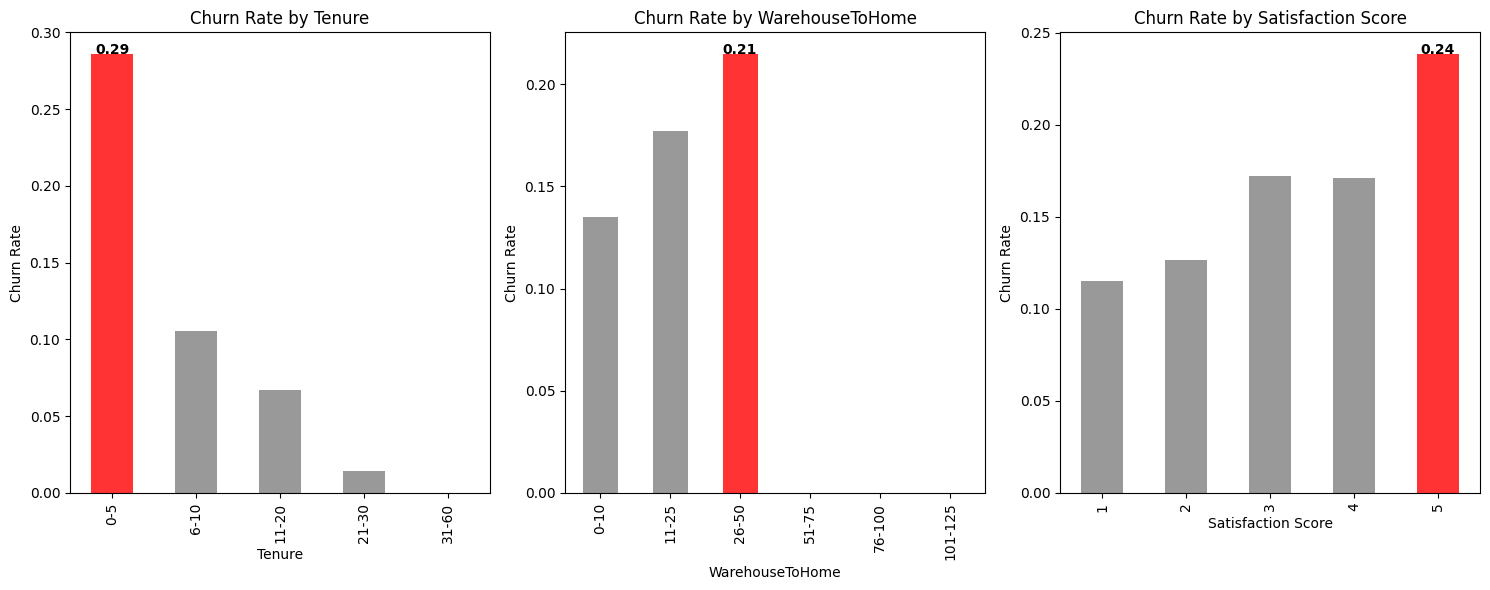

In [16]:
# Define the two numerical columns and their respective bins
selected_columns_bins = {
    'Tenure': [0, 5, 10, 20, 30, 60],
    'WarehouseToHome': [0, 10, 25, 50, 75, 100, 125]
}

# Corresponding labels for the bins
selected_labels = {
    'Tenure': ['0-5', '6-10', '11-20', '21-30', '31-60'],
    'WarehouseToHome': ['0-10', '11-25', '26-50', '51-75', '76-100', '101-125']
}

# Create a figure
plt.figure(figsize=(15, 6))

# Plot Tenure and WarehouseToHome with binning
for i, (column, bins) in enumerate(selected_columns_bins.items(), 1):
    plt.subplot(1, 3, i)
    
    # Bin the column values
    e_commerce[f'{column}_Binned'] = pd.cut(e_commerce[column], bins=bins, labels=selected_labels[column])
    
    # Calculate the churn rate for each bin
    churn_rate = e_commerce.groupby(f'{column}_Binned')['Churn'].mean()
    
    # Find the bin with the highest churn rate
    highest_churn_bin = churn_rate.idxmax()
    
    # Plot churn rate by the binned feature
    colors = ['grey' if bin_label != highest_churn_bin else 'red' for bin_label in churn_rate.index]
    churn_rate.plot(kind='bar', color=colors, alpha=0.8)
    
    # Highlight the highest churn rate with a label
    for idx, rate in enumerate(churn_rate):
        if churn_rate.index[idx] == highest_churn_bin:
            plt.text(idx, rate, f'{rate:.2f}', ha='center', color='black', fontweight='bold')
    
    plt.title(f'Churn Rate by {column}')
    plt.xlabel(column)
    plt.ylabel('Churn Rate')

# Plot SatisfactionScore without binning
plt.subplot(1, 3, 3)
churn_rate = e_commerce.groupby('SatisfactionScore')['Churn'].mean()

# Find the satisfaction score with the highest churn rate
highest_churn_bin = churn_rate.idxmax()

# Plot churn rate by Satisfaction Score
colors = ['grey' if score != highest_churn_bin else 'red' for score in churn_rate.index]
churn_rate.plot(kind='bar', color=colors, alpha=0.8)

# Highlight the highest churn rate with a label
for idx, rate in enumerate(churn_rate):
    if churn_rate.index[idx] == highest_churn_bin:
        plt.text(idx, rate, f'{rate:.2f}', ha='center', color='black', fontweight='bold')

plt.title('Churn Rate by Satisfaction Score')
plt.xlabel('Satisfaction Score')
plt.ylabel('Churn Rate')

plt.tight_layout()
plt.show()

# Clean up temporary columns
e_commerce.drop([f'{column}_Binned' for column in selected_columns_bins.keys()], axis=1, inplace=True)


1. ***Tenure vs Churn:***
Customers with 0-5 months of tenure have the highest churn rate (29%).
This indicates that customers who are in the early stages (within the first 5 months) are more likely to churn.
As tenure increases, churn rates drop steadily, with customers who stay longer than 20 months showing a very low churn rate (below 5%).
Engaging with new customers early on may help improve retention and reduce churn in this critical period.

2. ***Warehouse to Home Distance vs Churn:***
Customers living 26-50 units away from the warehouse have the highest churn rate (21%).
Those who live closer to the warehouse (0-25 units away) show lower churn rates (around 10-15%).
This suggests that customers living farther from the warehouse may face delivery-related issues, leading to higher churn. Offering faster or more reliable delivery options to these customers may help mitigate churn risk

2. ***Satisfaction Score vs Churn:***
Surprisingly, customers with a Satisfaction Score of 5 have the highest churn rate at 24%, which is contrary to typical expectations.
This could indicate that while customers give high satisfaction scores, there might be other factors influencing their decision to leave. Further investigation is needed to understand why highly satisfied customers are churning at higher rates.

#### **4. Marital Status and Preferred Payment Mode**
This chart combines Marital Status and Preferred Payment Mode to analyze how these factors together impact churn. We want to see if customers' marital status and their preferred way to pay have any connection to churn. Understanding these patterns can help us focus marketing strategies on groups with a higher risk of churn based on their payment preferences and marital status.

Churn rate by Marital Status and Preferred Payment Mode:


PreferredPaymentMode,Cash on Delivery,Credit Card,Debit Card,E wallet,UPI
MaritalStatus,,,,,
Divorced,0.179487,0.151515,0.152047,0.129630,0.071429
Married,0.147287,0.117647,0.089701,0.141104,0.162602
Single,0.426966,0.179211,0.255208,0.444444,0.250000


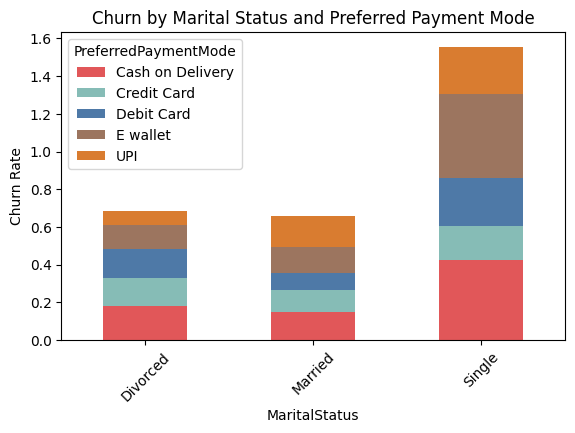

In [17]:
# Cross-tab analysis to combine two key segmentation factors and calculate churn rates
# Cross-tab analysis for Marital Status and Preferred Payment Mode
cross_tab_marital_payment = pd.crosstab(e_commerce['MaritalStatus'], e_commerce['PreferredPaymentMode'], values=e_commerce['Churn'], aggfunc='mean')
print('Churn rate by Marital Status and Preferred Payment Mode:')
display(cross_tab_marital_payment)

# Visualization for Marital Status and Preferred Payment Mode
cross_tab_marital_payment.plot(kind='bar', stacked=True, figsize=(6.5, 4), color=['#E15759','#86BCB6', '#4E79A7',    '#9C755F','#D97C30'])
plt.title('Churn by Marital Status and Preferred Payment Mode')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.show()

* `Single customers` show high churn rates across almost all payment modes, especially with Cash on Delivery (42.7%) and E-Wallet (44.4%).
* `Married customers` have the lowest churn rates, particularly with Debit Card (8.9%).
* `Divorced customers` generally have lower churn, especially with UPI (7%).
Actionable Insight:

#### **5. City Tier and Preferred Order Category**
This visualization helps us see if customers in different city tiers have different product preferences, which might affect their likelihood to churn. For example, customers in Tier 3 cities might face challenges when ordering certain categories like Mobile Phones, leading to higher churn.

Churn rate by City Tier and Preferred Order Category:


PreferedOrderCat,Fashion,Grocery,Laptop & Accessory,Mobile Phone,Others
CityTier,,,,,
1,0.106996,0.015038,0.055866,0.244552,0.06383
2,0.333333,0.000000,0.000000,0.307692,0.00000
3,0.215190,0.123077,0.161638,0.422819,0.16000


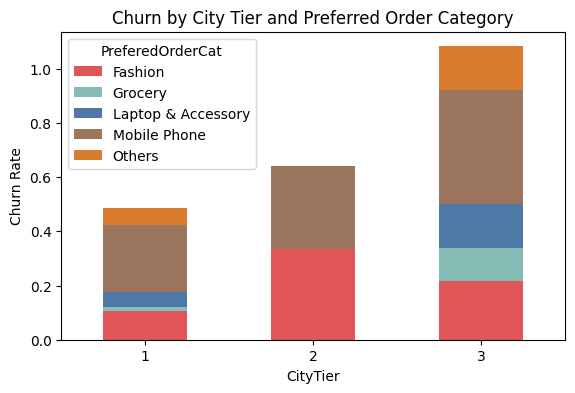

In [18]:
# Cross-tab analysis for City Tier and Preferred Order Category
cross_tab_citytier_ordercat = pd.crosstab(e_commerce['CityTier'], e_commerce['PreferedOrderCat'], values=e_commerce['Churn'], aggfunc='mean')
print('Churn rate by City Tier and Preferred Order Category:')
display(cross_tab_citytier_ordercat)

# Visualization for City Tier and Preferred Order Category
cross_tab_citytier_ordercat.plot(kind='bar', stacked=True, figsize=(6.5, 4), color=['#E15759','#86BCB6', '#4E79A7',    '#9C755F','#D97C30'])
plt.title('Churn by City Tier and Preferred Order Category')
plt.ylabel('Churn Rate')
plt.xticks(rotation=0)
plt.show()


2. ***City Tier + Preferred Order Category***:
* `Tier 1 customers` buying Mobile Phones (24.4%) are churning the most in this group.
* `Tier 2 customers` shopping for Fashion (33.3%) also show high churn rates.
* `Tier 3 customers` buying Mobile Phones (42.2%) are the most likely to churn, which indicates region-specific issues, possibly with delivery, product availability, or affordability.


## **Churn Prediction with Machine Learning**

### **Pre-Process the Data**

##### ***Creating Flag-Based Features Based on Insights:***
We are creating final flag-based features to identify high-risk customer segments that are prone to churn, based on patterns observed during the EDA. These flags will highlight critical groups, such as `Short-Tenure Customers`, `Far Living Customers`, and those using specific `Payment Methods` or `Ordering Categories`.

In [19]:
# Feature 1: Risk Flag for Short Tenure (customers with tenure 0-5 months)
e_commerce['ShortTenureFlag'] = (e_commerce['Tenure'] <= 5).astype(int)

# Feature 2: Risk Flag for Warehouse to Home Distance (customers living 26-50 units away)
e_commerce['HighRiskDistance'] = ((e_commerce['WarehouseToHome'] > 25) & (e_commerce['WarehouseToHome'] <= 50)).astype(int)

# Feature 4: Interaction Feature for Single Customers + High Risk Payment Mode (Cash on Delivery or E-Wallet)
e_commerce['Single_COD_EWallet'] = ((e_commerce['MaritalStatus'] == 'Single') & 
                                    (e_commerce['PreferredPaymentMode'].isin(['Cash on Delivery', 'E wallet']))).astype(int)

# Feature 5: Interaction Feature for Tier 3 Customers + Mobile Phone Orders
e_commerce['Tier3_MobilePhone'] = ((e_commerce['CityTier'] == 3) & 
                                   (e_commerce['PreferedOrderCat'] == 'Mobile Phone')).astype(int)

# Display the new flag features
e_commerce[['ShortTenureFlag', 'HighRiskDistance', 'Single_COD_EWallet', 'Tier3_MobilePhone']].head()


,ShortTenureFlag,HighRiskDistance,Single_COD_EWallet,Tier3_MobilePhone
0,1,0,0,0
1,0,0,0,0
2,0,1,0,0
3,1,0,0,0
4,1,0,0,0


##### ***Pre-processing:***
Now that we've finalized the flag features, the next step is to pre-process the data. This involves encoding categorical variables into numerical format and scaling the numerical features. We'll use One-Hot Encoding for multi-category columns and Label Encoding for binary columns, followed by scaling the numerical features to ensure they are on the same scale for model training.

In [20]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

# Step 1: Encoding categorical features

# Binary categorical columns (using Label Encoding)
binary_columns = ['PreferredLoginDevice', 'Gender']
le = LabelEncoder()
for column in binary_columns:
    e_commerce[column] = le.fit_transform(e_commerce[column])

# Multi-category columns (using One-Hot Encoding)
multi_category_columns = ['PreferredPaymentMode', 'PreferedOrderCat', 'MaritalStatus']
e_commerce = pd.get_dummies(e_commerce, columns=multi_category_columns)

# Step 2: Scaling numerical features
scaler = StandardScaler()
numerical_columns = ['Tenure', 'DaySinceLastOrder', 'WarehouseToHome', 'OrderAmountHikeFromlastYear', 'HourSpendOnApp', 'CouponUsed', 'OrderCount']
e_commerce[numerical_columns] = scaler.fit_transform(e_commerce[numerical_columns])

# Display the first few rows of the processed data
e_commerce.head()


,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,...,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,50001,1,-0.733989,1,3,-1.146379,0,0.092654,3,2,...,False,False,False,False,True,False,False,False,False,True
1,50002,1,-0.135704,1,1,-0.906721,1,0.092654,4,3,...,False,True,False,False,False,True,False,False,False,True
2,50003,1,-0.135704,1,1,1.729519,1,-1.324850,4,3,...,False,False,False,False,False,True,False,False,False,True
3,50004,1,-1.212618,1,3,-0.067917,1,-1.324850,4,5,...,False,False,False,False,True,False,False,False,False,True
4,50005,1,-1.212618,1,1,-0.427405,1,0.092654,3,5,...,False,False,False,False,False,True,False,False,False,True


##### ***Correlation of Features with Churn:***
We are focusing on the correlation of each feature with the churn column to simplify the analysis. This will help us identify which features have the strongest relationship with churn, allowing us to prioritize them during model building.

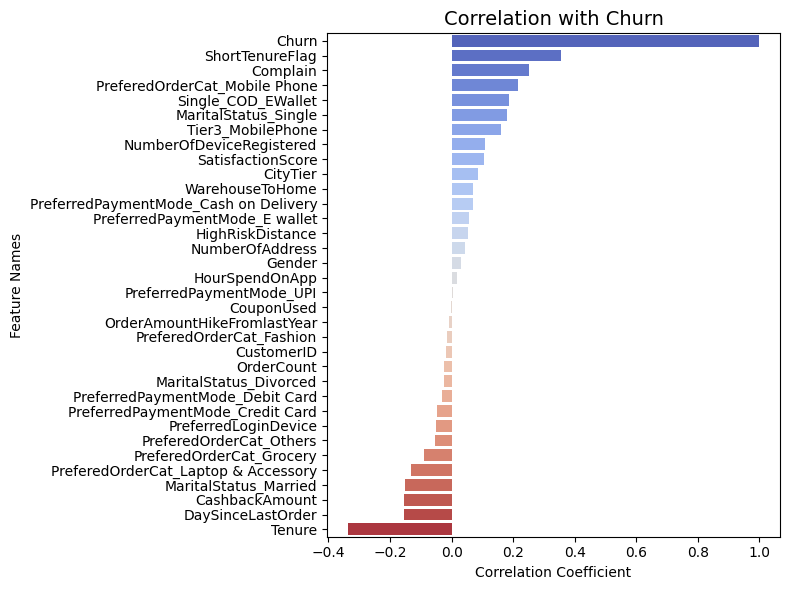

In [21]:
correlation_data = e_commerce.select_dtypes(include=['float64', 'int64', 'bool','int32'])

# Compute the correlation matrix
correlation_matrix = correlation_data.corr()

# Filter out correlations only with the 'Churn' column
churn_corr = correlation_matrix['Churn'].sort_values(ascending=False)

# Plot only correlations with churn
plt.figure(figsize=(8, 6))
sns.barplot(x=churn_corr.values, y=churn_corr.index, palette='coolwarm')
plt.title('Correlation with Churn', fontsize=14)
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature Names')
plt.tight_layout()
plt.show()

***Strongest Positive Correlations:***

* *ShortTenureFlag:* As flagged earlier, short-tenure customers are more likely to churn. The correlation is extremely high, making tenure an important predictor.

* *Complain:* Customers who have submitted complaints are strongly correlated with churn, signaling customer dissatisfaction as a churn driver.

* *PreferredOrderCat_Mobile Phone:* Mobile Phone shoppers tend to have higher churn rates, possibly due to issues with product or service.

* *Single_COD_EWallet:* A combination of single customers using Cash on Delivery or E-Wallet also shows high churn rates.

***Moderate Positive Correlations:***

* *Tier3_MobilePhone:* This group, particularly Tier 3 customers buying mobile phones, has a notable correlation with churn.

* *HighRiskDistance:* Customers who live far from the warehouse, identified through this flag, have an increased likelihood of churn.

***Strongest Negative Correlations:***

* *Tenure:* As expected, long-tenure customers are less likely to churn.

* *DaySinceLastOrder:* The more recent the last order, the lower the likelihood of churn.

* *CashbackAmount:* Cashback incentives slightly reduce churn, though the effect is weaker compared to other factors.

#### **Logistic Regression Model**

Accuracy Score: 0.9040852575488455
Precision Score: 0.808
Recall Score: 0.5459459459459459
F1 Score: 0.6516129032258065


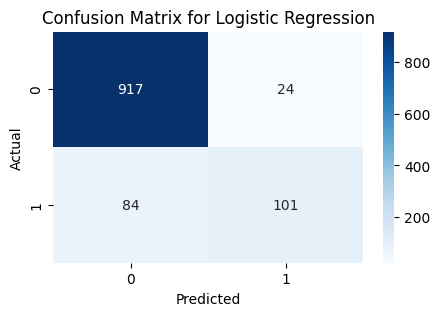

In [22]:
# Importing necessary libraries for Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Splitting the dataset into features (X) and target (y)
X = e_commerce.drop(columns=['Churn', 'CustomerID'])  # Dropping the target column and CustomerID
y = e_commerce['Churn']

# Splitting the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate and fit the Logistic Regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate the model
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
print("Accuracy Score:", accuracy_score(y_test, y_pred_log_reg))
print("Precision Score:", precision_score(y_test, y_pred_log_reg))
print("Recall Score:", recall_score(y_test, y_pred_log_reg))
print("F1 Score:", f1_score(y_test, y_pred_log_reg))
# Build and display the confusion matrix
cm = confusion_matrix(y_test, y_pred_log_reg)
df_cm = pd.DataFrame(cm, index=(0, 1), columns=(0, 1))
plt.figure(figsize=(5, 3))
sns.heatmap(df_cm, annot=True, fmt='g', cmap="Blues")
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The Logistic Regression model gave us these results:
* ***Accuracy (90.4%):*** The model correctly predicts around 90.4% of the test cases, which is a strong performance for a churn analysis model.

* ***Precision (80.8%):*** Out of all customers predicted to churn, 80.8% actually churned. This suggests that the model is good at identifying churners, though there is still room for improvement.

* ***Recall (54.6%):*** The model correctly identified 54.6% of actual churners, meaning it missed a significant portion of customers who churned. Improving recall is key to capturing more churners.

* ***F1 Score (65.2%):*** The F1 score, which balances precision and recall, is moderate. While precision is relatively strong, the low recall indicates that the model struggles to catch all churners.

Let's try improving recall by testing another model, such as Decision Trees.

#### **Building a Decision Tree Classifier for Churn Prediction**

We are now going to build a Decision Tree model to improve recall, which will help us capture more churn cases. Decision Trees are known for their ability to handle complex relationships between features, making them a good alternative to Logistic Regression.



Decision Tree Results:
Accuracy Score: 0.9698046181172292
Precision Score: 0.912568306010929
Recall Score: 0.9027027027027027
F1 Score: 0.907608695652174


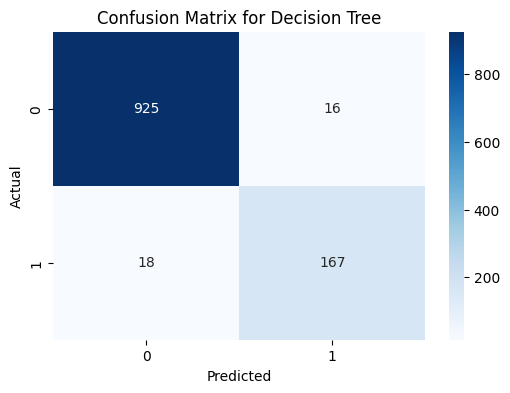

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Build the Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = decision_tree.predict(X_test)

# Evaluate the performance
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

# Print the results
print("Decision Tree Results:")
print("Accuracy Score:", accuracy_dt)
print("Precision Score:", precision_dt)
print("Recall Score:", recall_dt)
print("F1 Score:", f1_dt)

# Build the confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
df_cm_dt = pd.DataFrame(cm_dt, index=[0, 1], columns=[0, 1])

# Plot the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(df_cm_dt, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


The Decision Tree model gave us these results:
* ***Accuracy (96.98%):*** The model correctly predicts almost 97% of the test cases, demonstrating high reliability in overall performance.

* ***Precision (91.26%):*** Out of all the customers predicted to churn, 91.26% actually churned. This indicates that the model is very good at identifying true churners with fewer false positives.

* ***Recall (90.27%):*** The model successfully identifies 90.27% of actual churners, which is a significant improvement over the logistic regression model. This means that the model is excellent at capturing customers who are likely to churn.

* ***F1 Score (90.76%):*** The F1 score shows a well-balanced performance between precision and recall. This high score indicates the model strikes a good balance between false positives and false negatives.


The Decision Tree model significantly improves both recall and overall prediction quality compared to the Logistic Regression model, making it a more effective tool for identifying at-risk customers.

# **Conclusion**

Our analysis identified key factors influencing churn, supported by two models: **Logistic Regression** and **Decision Tree**. Based on the data, we recommend the following strategies:

1. **Focus on New Customers**  
   - ***Insight:*** Customers with **0-5 months of tenure** have the highest churn rate at **29%**.  
   - ***Recommendation:*** Engage new customers early with personalized offers, proactive onboarding, and tailored support to improve retention and build loyalty.

2. **Improve Customer Satisfaction**  
   - ***Insight:*** Customers with a **satisfaction score of 5** still exhibit a **24%** churn rate, suggesting that satisfaction scores alone don’t explain their decisions.  
   - ***Recommendation:*** Investigate why highly satisfied customers are churning. Introducing loyalty programs and gathering deeper feedback can help address potential issues not captured in satisfaction surveys.

3. **Optimize Delivery for Distant Customers**  
   - ***Insight:*** Customers living **26-50 units away** from the warehouse have a **21%** churn rate, likely due to delivery-related issues.  
   - ***Recommendation:*** Improve delivery options, like faster shipping or local pickup points, to enhance convenience for customers living farther from the warehouse.

---

##### **Model Performance: Logistic Regression vs Decision Tree**

- **Logistic Regression:**
  - ***Accuracy:*** 90.4%
  - ***Precision:*** 80.8%
  - ***Recall:*** 54.6%
  - ***F1 Score:*** 65.2%

- **Decision Tree:**
  - ***Accuracy:*** 96.98%
  - ***Recall:*** 90.3%
  - ***F1 Score:*** 90.8%

While **Logistic Regression** provided reasonable accuracy, the **Decision Tree** model outperformed it, especially in recall. This makes the Decision Tree the preferred model for accurately identifying at-risk customers and crafting targeted retention strategies.
